# pvlib-Python Forecasting (Albuquerque, NM)
### Install Standard Release 

In [1]:
# pip Upgrade
!pip install --upgrade pip

Requirement already up-to-date: pip in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (20.1.1)


In [2]:
# Package from the Python Package Index
!pip install pvlib

# Module netCDF4 was not found 
!pip install netCDF4

# Module siphon was not found
!pip install siphon

# 4/20/2020: version 1.1.2 released. Code optimization, fix logic so only_use_cftime_datimes=False works as expected (issues #158 and #165). 
!pip install cftime==1.1.2


# Try to save Excel
!pip install openpyxl

In [3]:
# Make basic imports and then set the location and time range data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytz
import seaborn as sns; sns.set_color_codes()
import datetime

# Import pvlib forecast models
from pvlib.forecast import GFS, NAM, NDFD, HRRR, RAP
from pvlib import solarposition
from pvlib.location import Location
from matplotlib.pyplot import figure
%matplotlib inline

# Specify Location (Albuiquerque, NM)
latitude, longitude, tz = 35, -106.6, 'US/Mountain'

# Specify time range
start = pd.Timestamp(datetime.date.fromordinal(737596), tz=tz)
end = start + pd.Timedelta(days=1)
irrad_vars = ['ghi','dni','dhi']

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pvlib/forecast.py:19: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  'The forecast module algorithms and features are highly experimental. '


### Create Model

In [4]:
# GFS model, defaults to 0.5 degree resolution
# 0.25 deg available 
model = GFS() 

# Retrive data.returns panda.DataFrame object
raw_data = model.get_data(latitude, longitude, start, end)
print(raw_data.head())

                           Downward_Short-Wave_Radiation_Flux_surface_Mixed_intervals_Average  \
2020-06-20 06:00:00-06:00                                               73.0                    
2020-06-20 09:00:00-06:00                                                0.0                    
2020-06-20 12:00:00-06:00                                                0.0                    
2020-06-20 15:00:00-06:00                                              260.0                    
2020-06-20 18:00:00-06:00                                              542.0                    

                           Total_cloud_cover_convective_cloud  \
2020-06-20 06:00:00-06:00                                 0.0   
2020-06-20 09:00:00-06:00                                 0.0   
2020-06-20 12:00:00-06:00                                 0.0   
2020-06-20 15:00:00-06:00                                 0.0   
2020-06-20 18:00:00-06:00                                 0.0   

                          

### Process Data with pvlib

In [5]:
# Process this data before using it with pvlib
data = raw_data

# Rename the columns according the key/value pairs in model.variables.
data = model.rename(data)

# Convert temperature
data['temp_air'] = model.kelvin_to_celsius(data['temp_air'])

# Convert wind components to wind speed
data['wind_speed'] = model.uv_to_speed(data)

# Calculate irradiance estimates from cloud cover.
irrad_data = model.cloud_cover_to_irradiance(data['total_clouds'])
data = data.join(irrad_data, how='outer')

# Keep only the final data
data = data[model.output_variables]

print(data.head())

                            temp_air  wind_speed         ghi         dni  \
2020-06-20 06:00:00-06:00  17.250031    2.948430    0.369237    0.000000   
2020-06-20 09:00:00-06:00  15.766418    4.261653  522.864286  697.253992   
2020-06-20 12:00:00-06:00  13.850494    4.574727  917.397541  654.134271   
2020-06-20 15:00:00-06:00  31.596161    0.838318  873.577474  720.086720   
2020-06-20 18:00:00-06:00  41.976562    3.427562  376.491995  619.923842   

                                  dhi  total_clouds  low_clouds  mid_clouds  \
2020-06-20 06:00:00-06:00    0.369237           0.0         0.0         0.0   
2020-06-20 09:00:00-06:00  118.035273           0.0         0.0         0.0   
2020-06-20 12:00:00-06:00  298.115483           3.0         0.0         0.0   
2020-06-20 15:00:00-06:00  231.270886           0.0         0.0         0.0   
2020-06-20 18:00:00-06:00   98.481710           0.0         0.0         0.0   

                           high_clouds  
2020-06-20 06:00:00-06:00  

### GFS'S Class

In [6]:
# process_data method combines these steps in a single function
data = model.process_data(raw_data)
print(data.head())

# Implement their own process_data methods on inherited classes or implement similar stand-alone functions
# Also implement a get_processed_data() method that combines the get_data() and process_data() calls
data = model.get_processed_data(latitude, longitude, start, end)
print(data.head())

                            temp_air  wind_speed         ghi         dni  \
2020-06-20 06:00:00-06:00  17.250031    2.948430    0.369237    0.000000   
2020-06-20 09:00:00-06:00  15.766418    4.261653  522.864286  697.253992   
2020-06-20 12:00:00-06:00  13.850494    4.574727  917.397541  654.134271   
2020-06-20 15:00:00-06:00  31.596161    0.838318  873.577474  720.086720   
2020-06-20 18:00:00-06:00  41.976562    3.427562  376.491995  619.923842   

                                  dhi  total_clouds  low_clouds  mid_clouds  \
2020-06-20 06:00:00-06:00    0.369237           0.0         0.0         0.0   
2020-06-20 09:00:00-06:00  118.035273           0.0         0.0         0.0   
2020-06-20 12:00:00-06:00  298.115483           3.0         0.0         0.0   
2020-06-20 15:00:00-06:00  231.270886           0.0         0.0         0.0   
2020-06-20 18:00:00-06:00   98.481710           0.0         0.0         0.0   

                           high_clouds  
2020-06-20 06:00:00-06:00  

## Cloud Cover & Radiation

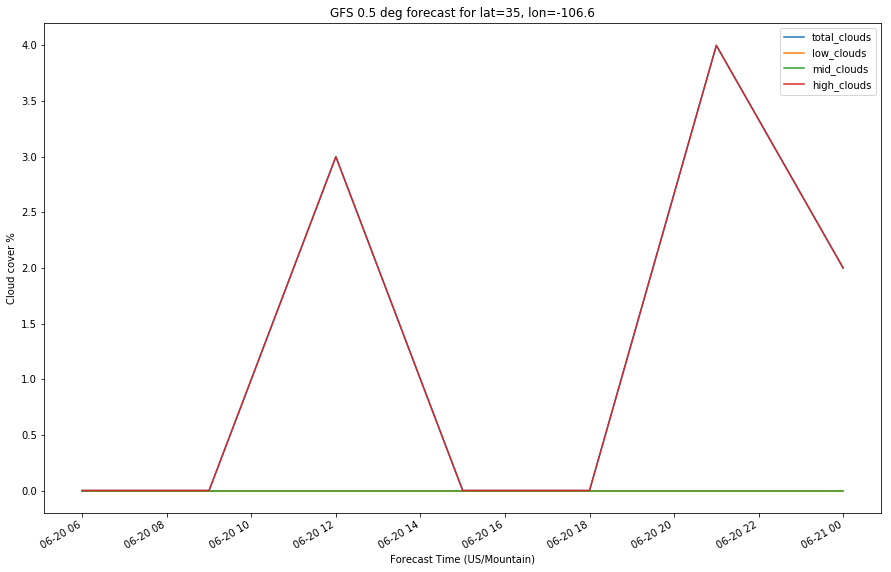

In [7]:
# Plot cloud cover percentages
cloud_vars = ['total_clouds', 'low_clouds','mid_clouds', 'high_clouds']
data[cloud_vars].plot(figsize=(15,10));
plt.ylabel('Cloud cover %');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

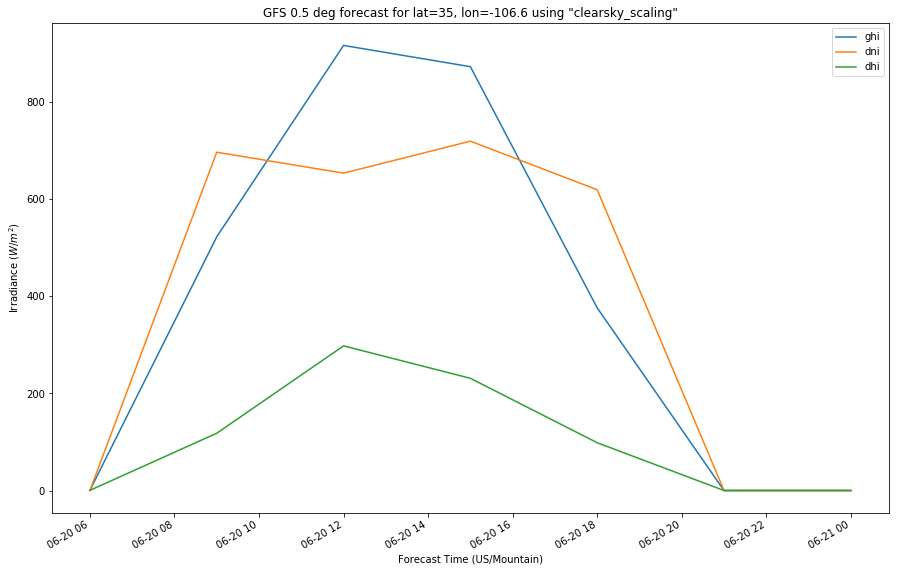

In [8]:
# Plot irradiance data
data = model.rename(raw_data)
irrads = model.cloud_cover_to_irradiance(data['total_clouds'], how='clearsky_scaling')
irrads.plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} using "clearsky_scaling"'.format(latitude, longitude));
plt.legend();

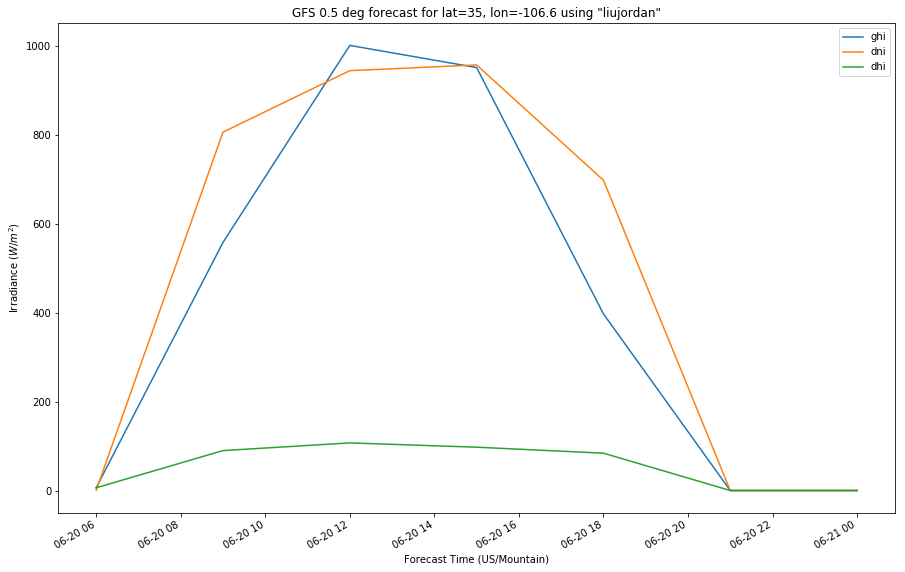

In [9]:
# Plot irradiance data
# Irradiance forecast one hour resolution as the weather data
irrads = model.cloud_cover_to_irradiance(data['total_clouds'], how='liujordan')
irrads.plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} using "liujordan"'.format(latitude, longitude));
plt.legend();

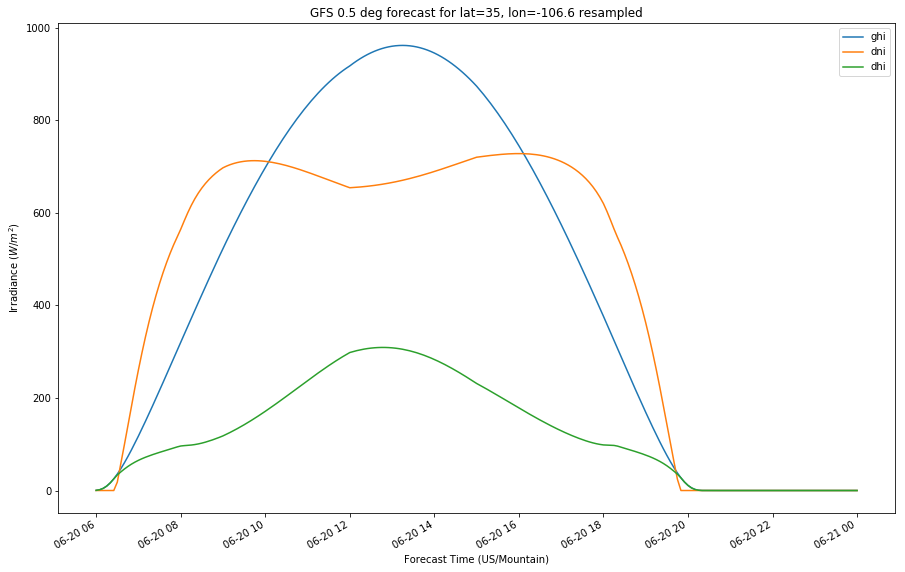

In [10]:
# Five min data resample
resampled_data = data.resample('5min').interpolate()
resampled_irrads = model.cloud_cover_to_irradiance(resampled_data['total_clouds'], how='clearsky_scaling')
resampled_irrads.plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} resampled'.format(latitude,longitude));
plt.legend();

## Weather Models
### GFS
The Global Forecast System is the US model that provides forecast for the entire globe (6hr update)
### HRRR

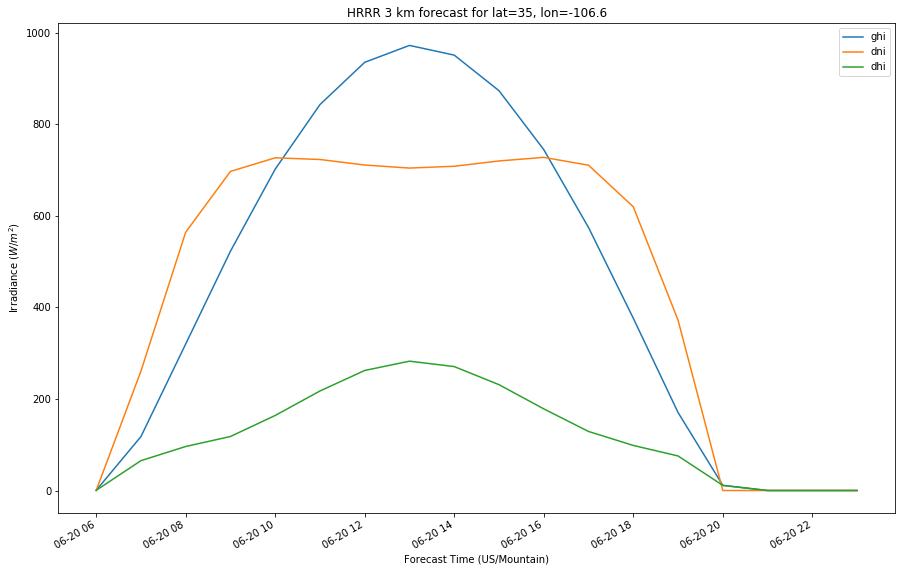

In [11]:
# High Resolution Rapid Refresh most accurate
# Only available for 15 hours
model = HRRR()
data = model.get_processed_data(latitude, longitude, start, end)
data[irrad_vars].plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('HRRR 3 km forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

In [12]:
hrrr_data=data[irrad_vars]
hrrr_data.describe()

,ghi,dni,dhi
count,18.000000,18.000000,18.000000
mean,450.967147,458.233861,122.269051
std,381.841111,318.601861,100.588796
min,0.000000,0.000000,0.000000
25%,37.870163,65.221864,24.725774
50%,449.678140,658.588917,108.258492
75%,818.682367,711.115063,207.702565
max,972.536057,727.934223,282.620711


### RAP

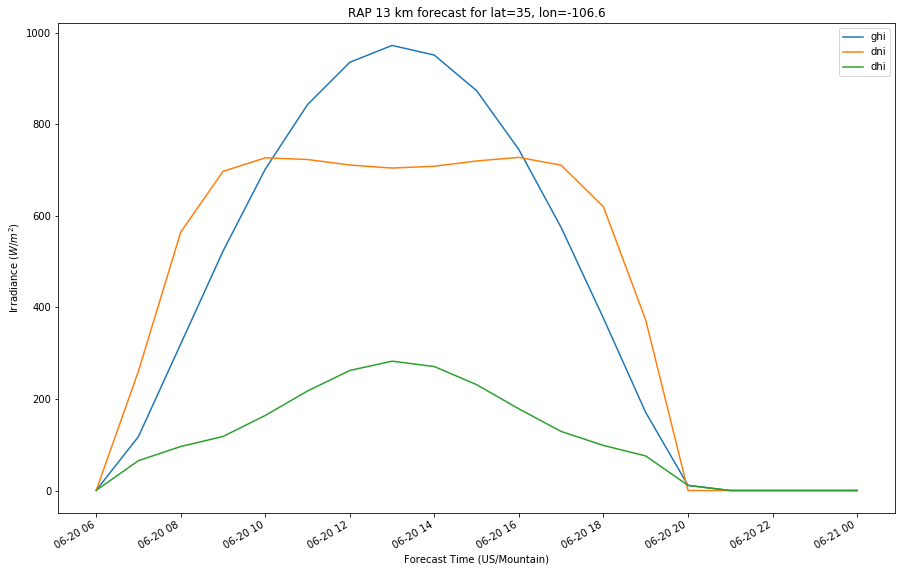

In [13]:
# The Rapid Refresh model is the parent model for the HRRR
# Updated every hour with a 20, 40 km resolution
model = RAP()
data = model.get_processed_data(latitude, longitude, start, end)
data[irrad_vars].plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('RAP 13 km forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

### NDFD

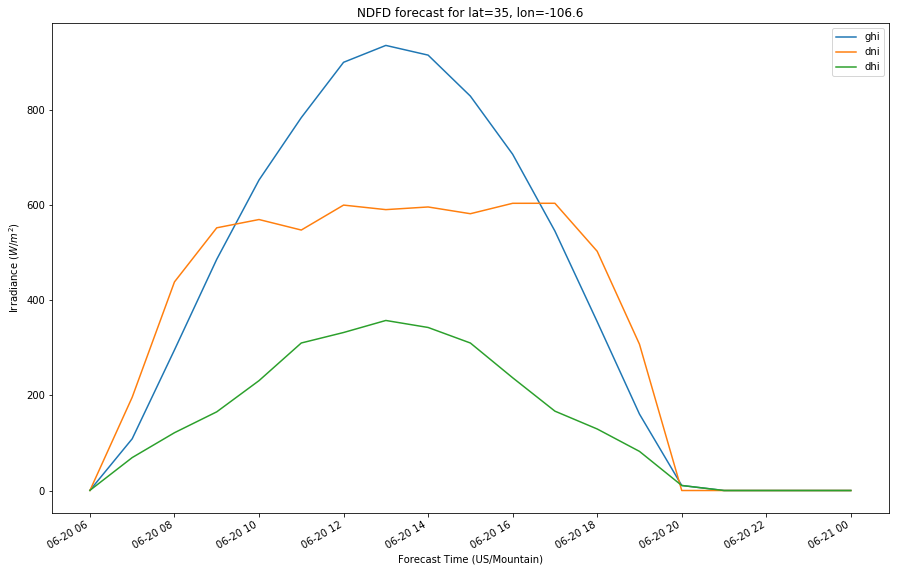

In [14]:
# The National Digital Forecast Database is not a model
# Is a collection of forecasts made by National Weather Service offices accross the country
# Updated every six hours
# Only available for the US
model = NDFD()
data = model.get_processed_data(latitude, longitude, start, end)
data[irrad_vars].plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('NDFD forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

In [15]:
ndfd_data=data[irrad_vars]
ndfd_data.describe()

,ghi,dni,dhi
count,19.000000,19.000000,19.000000
mean,404.058939,351.729414,150.671991
std,366.762431,266.701875,133.899437
min,0.000000,0.000000,0.000000
25%,5.455105,0.000000,5.455105
50%,354.467194,502.316448,129.198976
75%,744.553195,585.507783,273.256911
max,934.607118,603.139972,357.055744


# PV Power Forecast - HRRR

In [17]:
from pvlib.pvsystem import PVSystem, retrieve_sam
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS
from pvlib.tracking import SingleAxisTracker
from pvlib.modelchain import ModelChain
from pvlib import pvsystem

sandia_modules = retrieve_sam('sandiamod')
cec_inverters = retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = cec_inverters['iPower__SHO_5_2__240V_']
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

# model a big tracker for more fun
system = pvsystem.PVSystem(module_parameters=module, inverter_parameters=inverter, temperature_model_parameters=temperature_model_parameters, modules_per_string=14, strings_per_inverter=1)

# fx is a common abbreviation for forecast
fx_model = HRRR()
fx_data = fx_model.get_processed_data(latitude, longitude, start, end)
ac_data = fx_data.resample('5min').interpolate()

# use a ModelChain object to calculate modeling intermediates
mc = ModelChain(system, fx_model.location)

# extract relevant data for model chain
mc.run_model(ac_data)

ModelChain: 
  name: None
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [18]:
invdb = pvsystem.retrieve_sam('CECInverter')
invdb

,ABB__MICRO_0_25_I_OUTD_US_208__208V_,ABB__MICRO_0_25_I_OUTD_US_240__240V_,ABB__MICRO_0_3_I_OUTD_US_208__208V_,ABB__MICRO_0_3_I_OUTD_US_240__240V_,ABB__MICRO_0_3HV_I_OUTD_US_208__208V_,ABB__MICRO_0_3HV_I_OUTD_US_240__240V_,ABB__PVI_10_0_I_OUTD_x_US_208_y__208V_,ABB__PVI_10_0_I_OUTD_x_US_480_y_z__480V_,ABB__PVI_12_0_I_OUTD_x_US_480_y__480V_,ABB__PVI_3_0_OUTD_S_US__208V_,...,Zigor__Sunzet_3_TL_US__240V_,i_Energy__GT260__240V_,iPower__SHO_1_1__120V_,iPower__SHO_2_0__240V_,iPower__SHO_2_5__240V_,iPower__SHO_3_0__240V_,iPower__SHO_3_5__240V_,iPower__SHO_4_6__208V_,iPower__SHO_4_8__240V_,iPower__SHO_5_2__240V_
Vac,208,240,208,240,208,240,208,480,480,208,...,240,240,120,240,240,240,240,208,240,240
Pso,2.08961,2.24041,1.84651,1.95054,1.76944,1.84378,46.8638,67.7909,62.5547,18.1663,...,36.0334,2.5301,22.0954,24.4658,42.7765,31.682,64.7742,54.5701,85.1457,62.4867
Paco,250,250,300,300,300,300,10000,10000,12000,3000,...,3180,230,1100,2000,2500,3000,3500,4600,4800,5200
Pdco,259.589,259.492,311.669,311.581,312.421,312.005,10488.3,10296,12358.8,3142.3,...,3315.65,245.63,1194.09,2161.88,2632.84,3205.93,3641.84,4797.81,4968.03,5382.86
Vdco,40,40,40,40,45,45,320,362,370,310,...,375,40,182,199,218,222.5,263,254,263,280
C0,-4.1e-05,-3.9e-05,-3.3e-05,-3.4e-05,-4.5e-05,-3.5e-05,-2.7759e-06,-1.38839e-06,-1.009e-06,-8.03949e-06,...,-7.98467e-06,6.2e-05,-2.1e-05,-1.3e-05,-1.4e-05,-8.21046e-06,-9.08073e-06,-5.99928e-06,-6.16035e-06,-4.63524e-06
C1,-9.1e-05,-0.000132,-0.000192,-0.000256,-0.000196,-0.000227,-3.6e-05,-4.9e-05,-5.6e-05,-1.1e-05,...,-7.5e-05,-9.8e-05,5.7e-05,5.5e-05,6.1e-05,3.6e-05,3.5e-05,2.8e-05,3.4e-05,4.4e-05
C2,0.000494,0.002418,0.000907,0.002453,0.001959,-0.000526,0.000305,-0.00052,-0.001437,0.000999,...,0.000544,0.000231,0.002001,0.001703,0.002053,0.001708,0.001417,0.001381,0.000586,0.00126
C3,-0.013171,-0.014926,-0.031742,-0.028223,-0.023725,-0.041214,-0.002351,-0.003855,-0.007112,-0.000287,...,-0.000338,0.121032,0.000623,0.000315,0.00153,0.00086,0.001218,0.000889,0.000195,0.000367
Pnt,0.075,0.075,0.09,0.09,0.09,0.09,0.1,0.4,0.4,0.1,...,0.954,0.069,0.33,0.6,0.75,0.9,1.05,1.38,1.44,1.56


## ModelChain Attributes

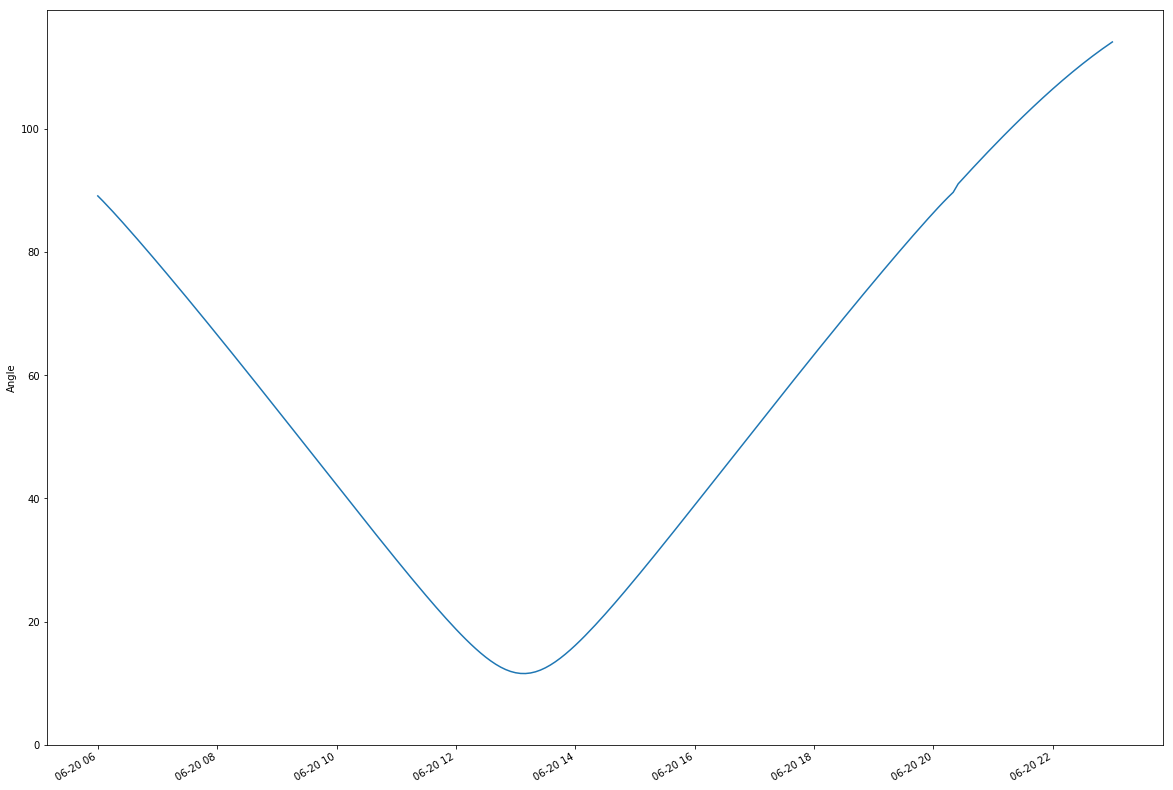

In [19]:
# ModelChain sotres modeling results on a series of attributes. 
# Angle of Incidence
mc.aoi.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('Angle');

## Modeling intermediates & Forecast power

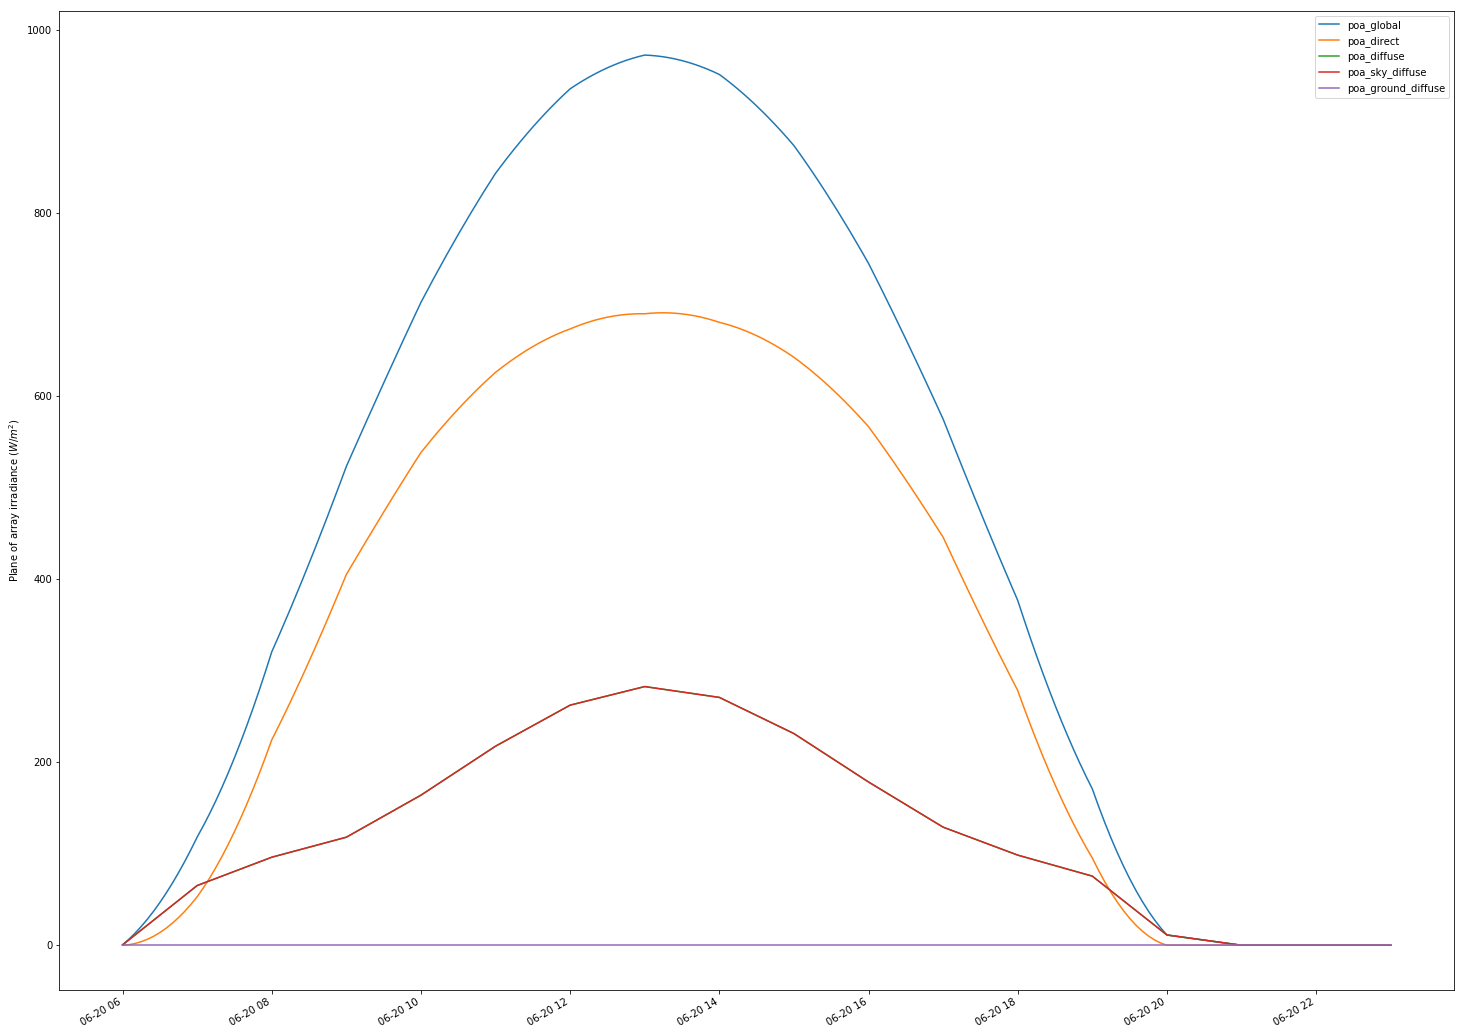

In [20]:
mc.total_irrad.plot(figsize=(25,20));
plt.ylabel('Plane of array irradiance ($W/m^2$)');
plt.legend(loc='best');

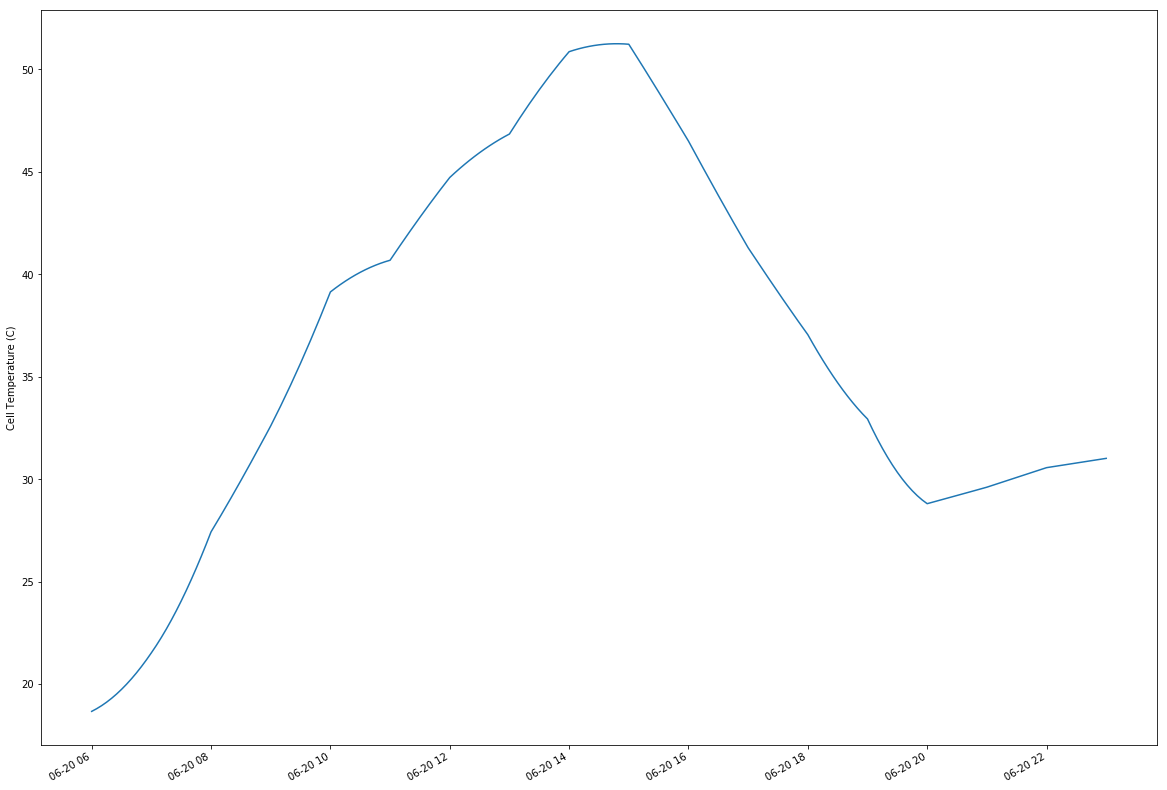

In [21]:
# Cell and module temperature
mc.cell_temperature.plot(figsize=(20,15));
plt.ylabel('Cell Temperature (C)');

## MC DC Power

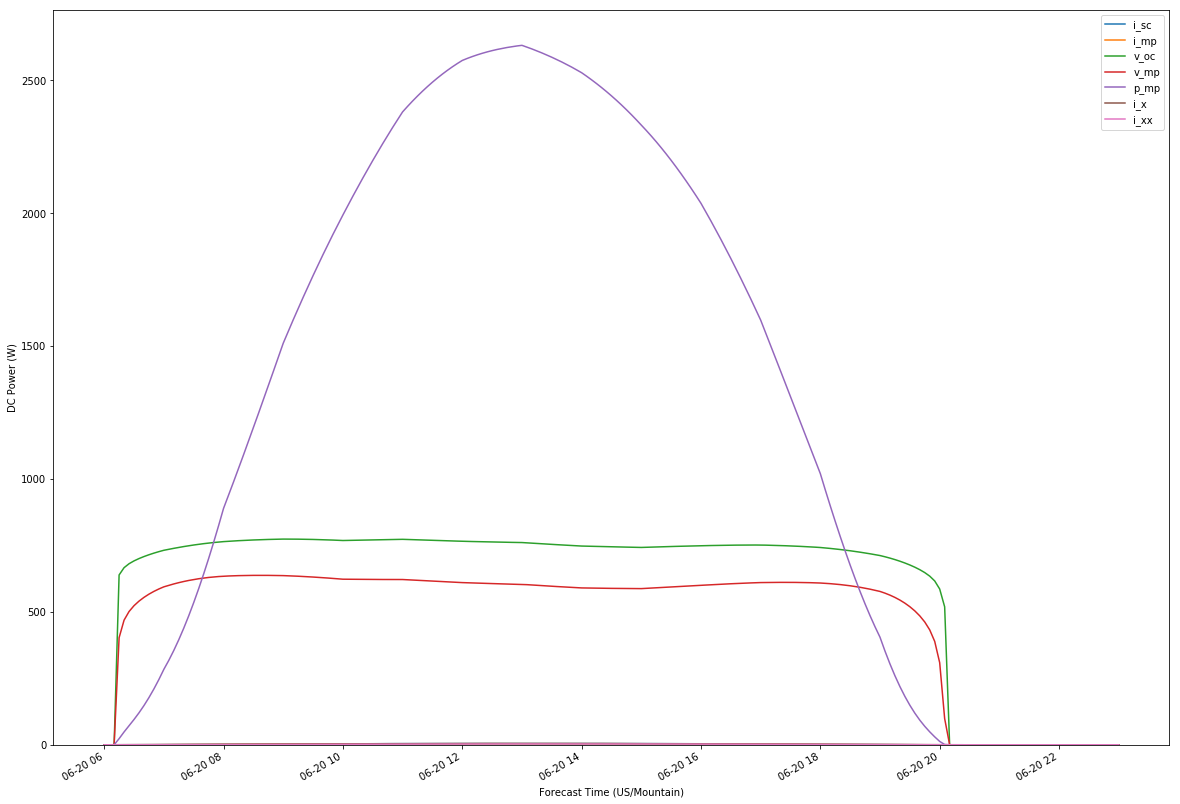

In [22]:
mc.dc.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('DC Power (W)');
plt.xlabel('Forecast Time ({})'.format(tz));

In [23]:
mc.dc.describe()

,i_sc,i_mp,v_oc,v_mp,p_mp,i_x,i_xx
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,2.388872,2.131813,606.229835,483.615512,1294.670459,2.332757,1.554113
std,1.869885,1.663430,291.724972,237.432210,1006.508432,1.827072,1.186120
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317367,0.286485,691.840300,540.431817,148.806995,0.309155,0.227685
50%,2.480547,2.222803,747.329476,599.975338,1404.002550,2.419996,1.677699
75%,4.294330,3.829772,764.283218,614.296966,2311.580352,4.194781,2.756624
max,4.901965,4.359417,773.896611,637.432910,2631.736561,4.790311,3.091223


In [24]:
mc.dc.fillna(0).to_csv('HRRR DC June 20.csv', encoding='utf-8')

## MC AC Power

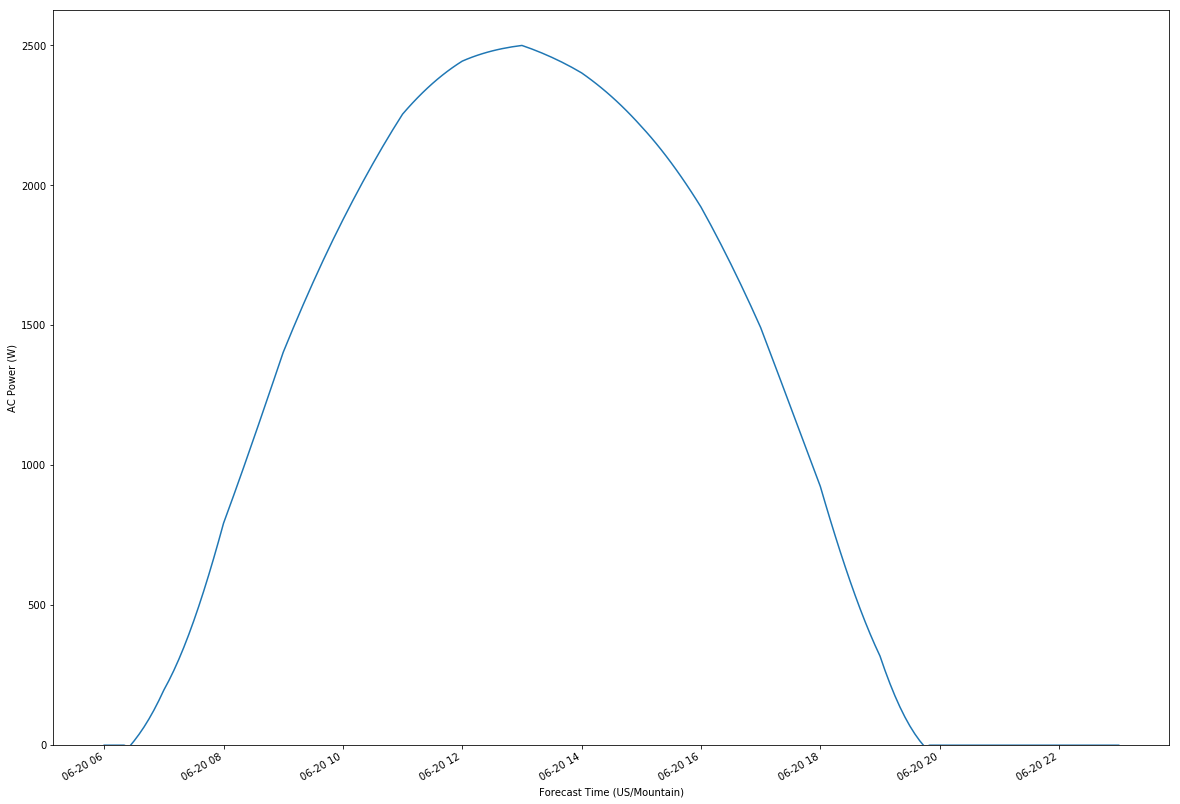

In [25]:
# AC Power
mc.ac.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('AC Power (W)');
plt.xlabel('Forecast Time ({})'.format(tz));

In [26]:
mc.ac.describe()

count     205.000000
mean     1206.629571
std       967.090197
min        -8.358183
25%        67.277320
50%      1298.183410
75%      2190.797418
max      2499.828308
dtype: float64

In [27]:
mc.ac.fillna(0)

2020-06-20 06:00:00-06:00      -1.560000
2020-06-20 06:05:00-06:00      -1.560000
2020-06-20 06:10:00-06:00      -1.560000
2020-06-20 06:15:00-06:00      -1.560000
2020-06-20 06:20:00-06:00      -1.560000
2020-06-20 06:25:00-06:00      -8.358183
2020-06-20 06:30:00-06:00      13.425556
2020-06-20 06:35:00-06:00      37.119720
2020-06-20 06:40:00-06:00      63.237456
2020-06-20 06:45:00-06:00      92.048053
2020-06-20 06:50:00-06:00     123.688726
2020-06-20 06:55:00-06:00     158.224069
2020-06-20 07:00:00-06:00     195.674650
2020-06-20 07:05:00-06:00     228.917868
2020-06-20 07:10:00-06:00     265.347525
2020-06-20 07:15:00-06:00     304.954954
2020-06-20 07:20:00-06:00     347.703584
2020-06-20 07:25:00-06:00     393.532674
2020-06-20 07:30:00-06:00     442.360707
2020-06-20 07:35:00-06:00     494.088684
2020-06-20 07:40:00-06:00     548.603211
2020-06-20 07:45:00-06:00     605.779353
2020-06-20 07:50:00-06:00     665.483366
2020-06-20 07:55:00-06:00     727.575049
2020-06-20 08:00

In [28]:
mc.ac.fillna(0).to_csv('HRRR AC June 20.csv', encoding='utf-8')

### HRRR Irradiance Data

In [29]:
hrrr_data

,ghi,dni,dhi
2020-06-20 06:00:00-06:00,0.369237,0.000000,0.369237
2020-06-20 07:00:00-06:00,117.801073,260.887455,65.223518
2020-06-20 08:00:00-06:00,320.138035,564.437067,96.160722
2020-06-20 09:00:00-06:00,522.864286,697.253992,118.035273
2020-06-20 10:00:00-06:00,702.184085,726.947564,163.966736
2020-06-20 11:00:00-06:00,843.297865,723.275865,217.480180
2020-06-20 12:00:00-06:00,935.642587,711.217693,262.318507
2020-06-20 13:00:00-06:00,972.536057,704.551843,282.620711
2020-06-20 14:00:00-06:00,951.344143,708.502923,270.786883
2020-06-20 15:00:00-06:00,873.577474,720.086720,231.270886


In [30]:
hrrr_data.to_csv('HRRR June 20.csv', encoding='utf-8')

# PV Power Forecast - NDFD

In [31]:
from pvlib.pvsystem import PVSystem, retrieve_sam
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS
from pvlib.tracking import SingleAxisTracker
from pvlib.modelchain import ModelChain
from pvlib import pvsystem

sandia_modules = retrieve_sam('sandiamod')
cec_inverters = retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = cec_inverters['iPower__SHO_5_2__240V_']
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

# model a big tracker for more fun
system = pvsystem.PVSystem(module_parameters=module, inverter_parameters=inverter, temperature_model_parameters=temperature_model_parameters, modules_per_string=14, strings_per_inverter=1)

# fx is a common abbreviation for forecast
fx_model = NDFD()
fx_data = fx_model.get_processed_data(latitude, longitude, start, end)
ac_data = fx_data.resample('5min').interpolate()

# use a ModelChain object to calculate modeling intermediates
mc = ModelChain(system, fx_model.location)

# extract relevant data for model chain
mc.run_model(ac_data)

ModelChain: 
  name: None
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

## ModelChain Attributes

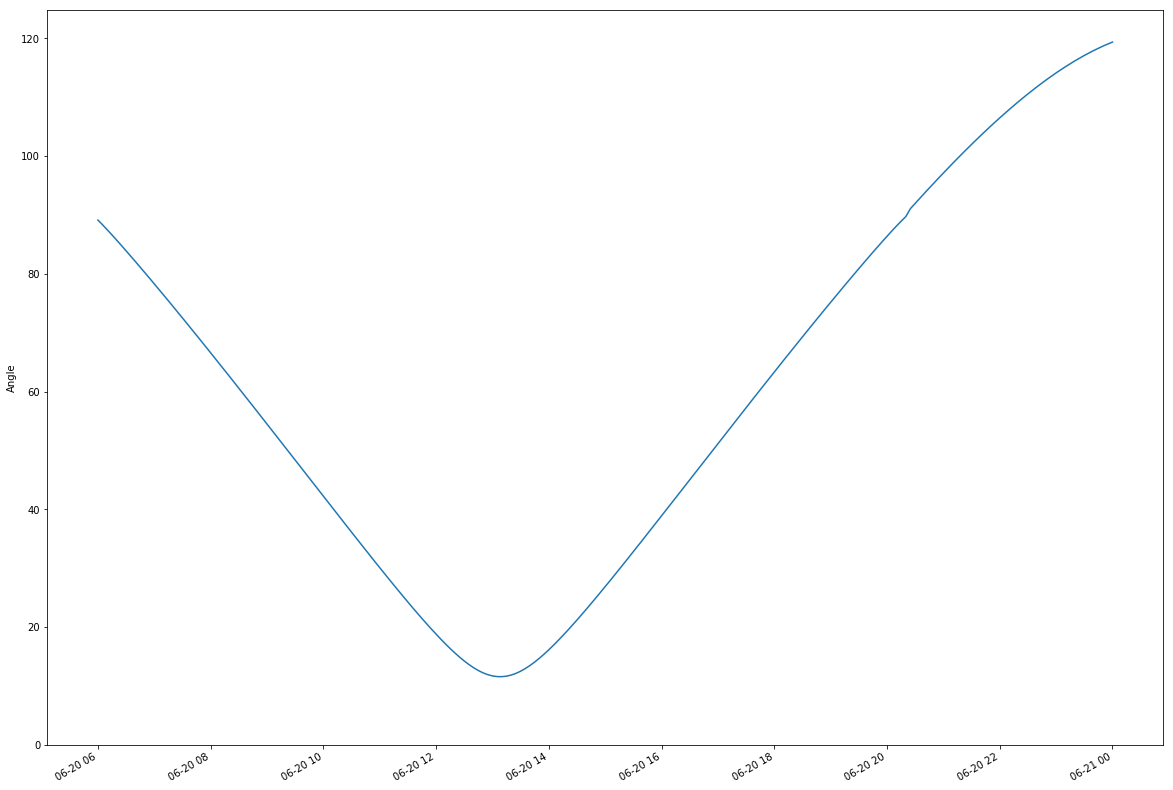

In [32]:
# ModelChain sotres modeling results on a series of attributes. 
# Angle of Incidence
mc.aoi.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('Angle');

## Modeling intermediates & Forecast power

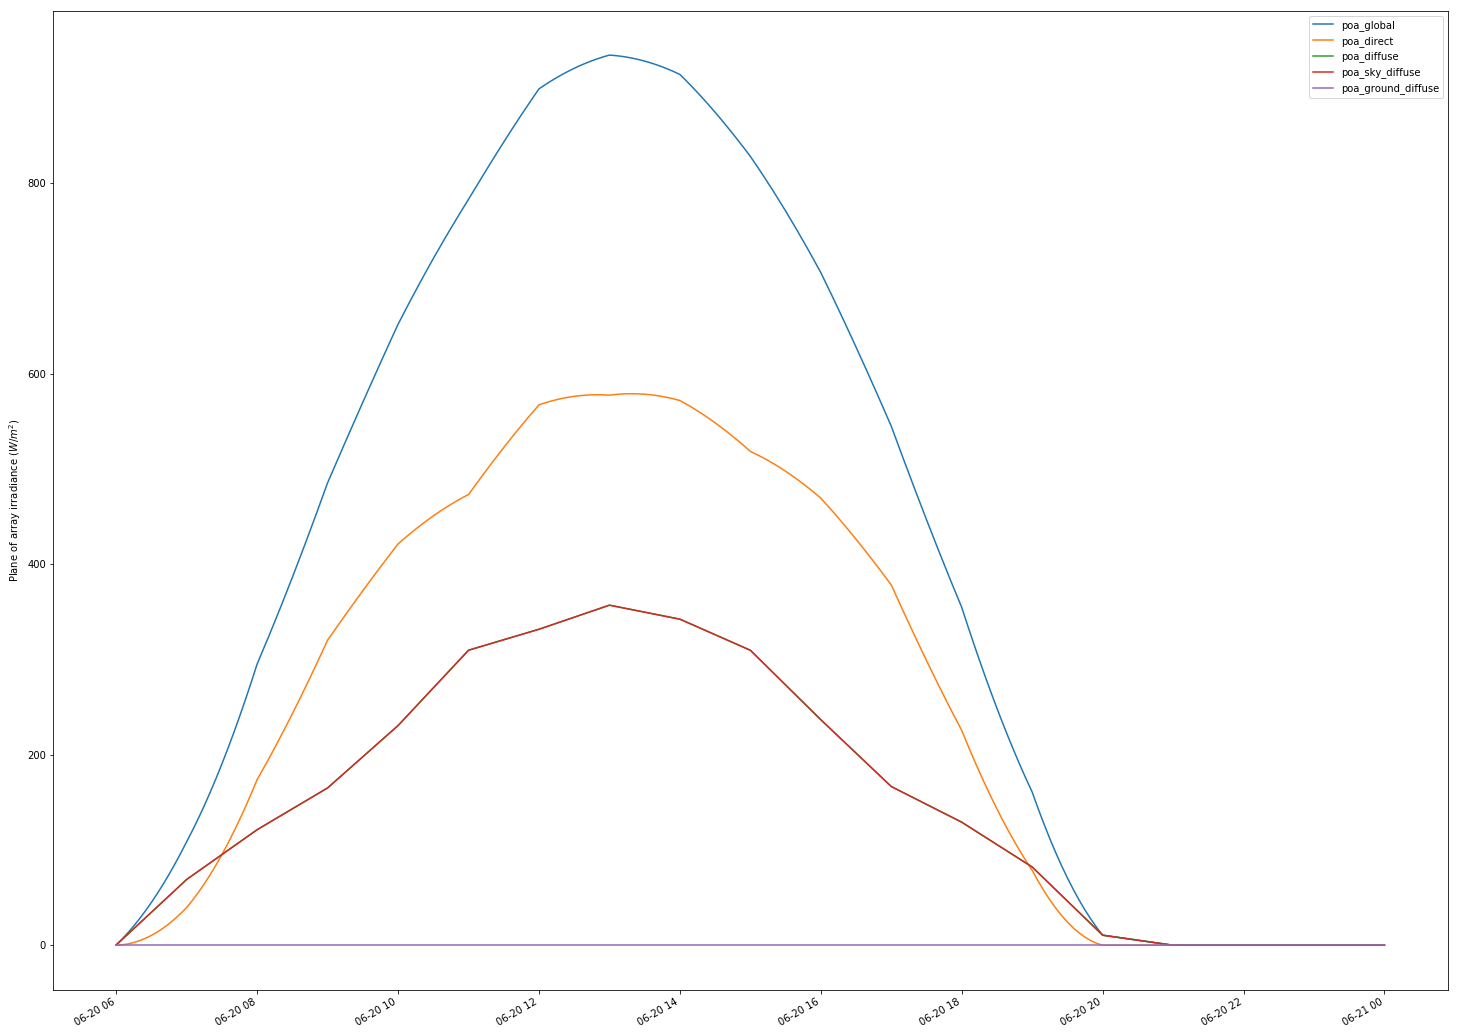

In [33]:
mc.total_irrad.plot(figsize=(25,20));
plt.ylabel('Plane of array irradiance ($W/m^2$)');
plt.legend(loc='best');

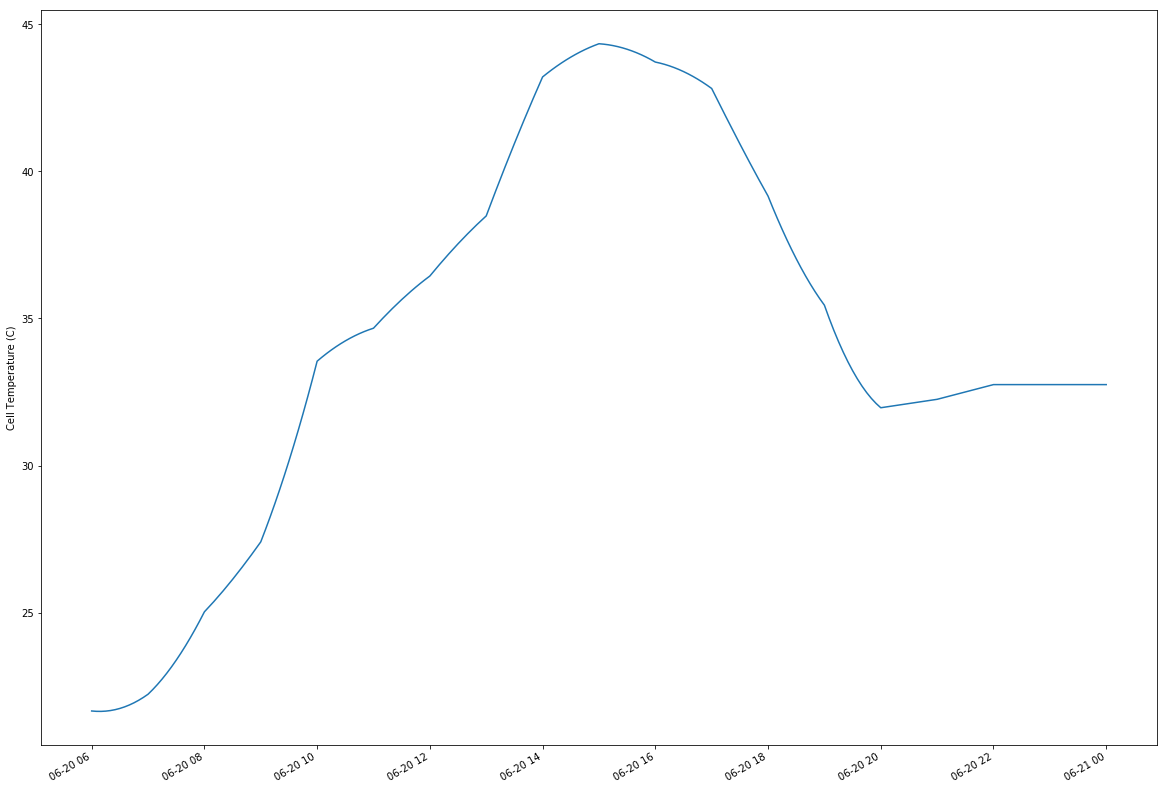

In [34]:
# Cell and module temperature
mc.cell_temperature.plot(figsize=(20,15));
plt.ylabel('Cell Temperature (C)');

## MC DC Power

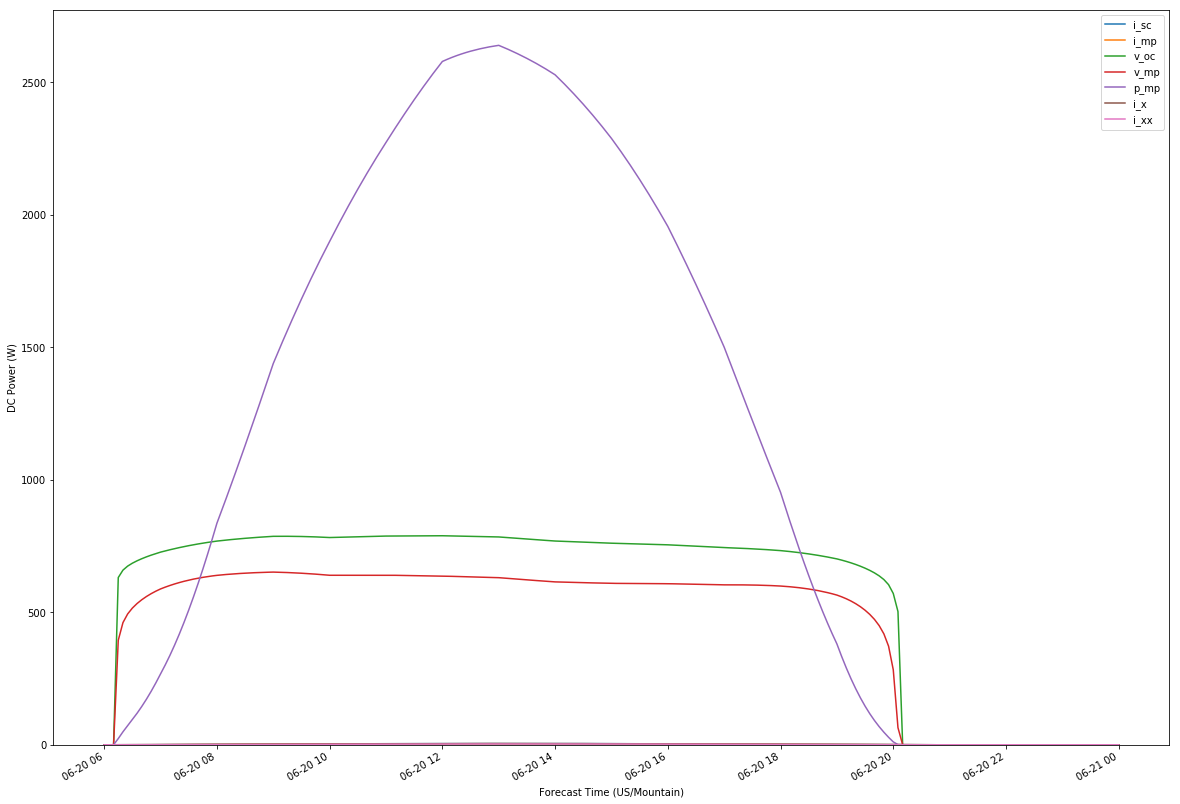

In [35]:
mc.dc.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('DC Power (W)');
plt.xlabel('Forecast Time ({})'.format(tz));

In [36]:
mc.dc.describe()

,i_sc,i_mp,v_oc,v_mp,p_mp,i_x,i_xx
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,2.134187,1.907539,578.008789,463.297667,1187.844100,2.083771,1.396358
std,1.797310,1.602530,319.432079,260.946605,1006.117350,1.755816,1.149614
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117264,0.106104,631.162248,418.539990,47.374989,0.114214,0.084574
50%,2.097785,1.881270,749.647890,606.906073,1178.152951,2.046032,1.434104
75%,3.931023,3.508053,781.696310,634.611690,2187.992626,3.838914,2.550930
max,4.696290,4.185968,788.903616,651.699787,2639.865506,4.588716,2.978440


In [37]:
mc.dc.fillna(0).to_csv('NDFD DC June 20.csv', encoding='utf-8')

## MC AC Power

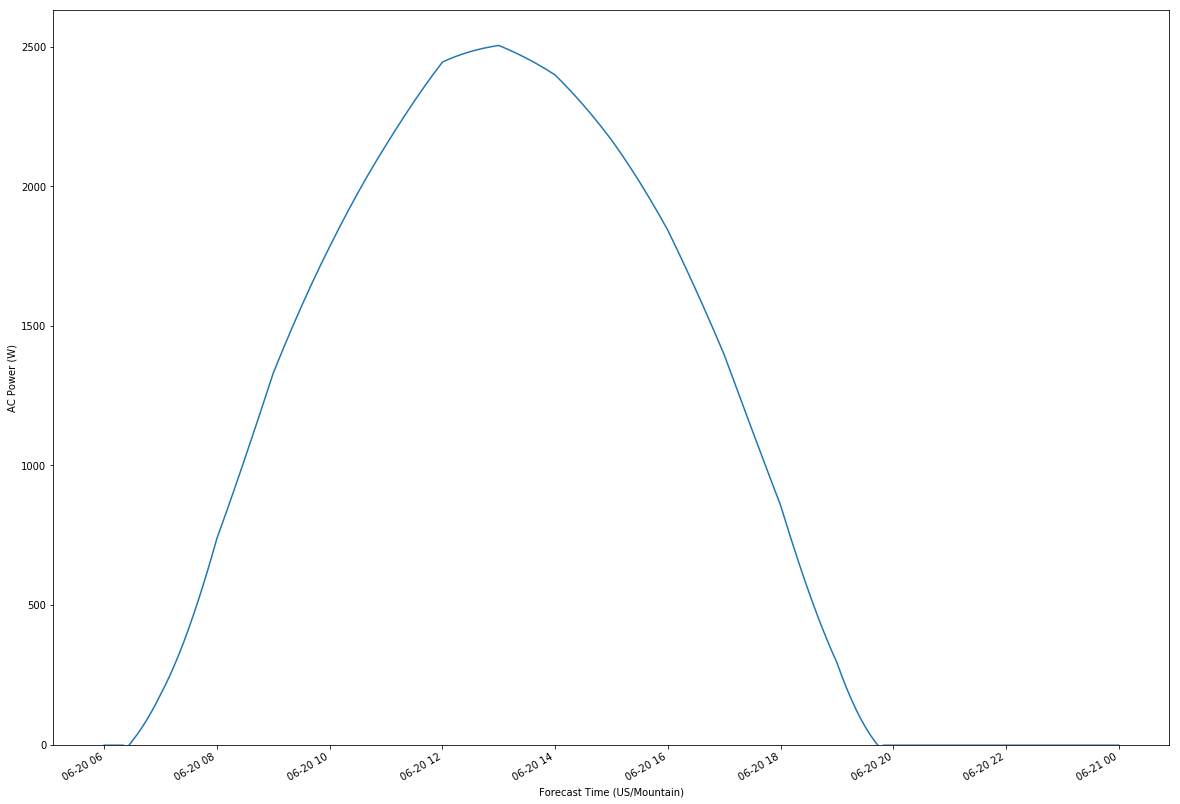

In [38]:
# AC Power
mc.ac.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('AC Power (W)');
plt.xlabel('Forecast Time ({})'.format(tz));

In [39]:
mc.ac.describe()

count     217.000000
mean     1104.396793
std       963.143203
min        -7.490308
25%        -1.560000
50%      1076.860351
75%      2067.634719
max      2504.081524
dtype: float64

In [40]:
mc.ac.fillna(0).to_csv('NDFD AC June 20.csv', encoding='utf-8')

### NDFD Irradiance Data

In [41]:
ndfd_data

,ghi,dni,dhi
2020-06-20 06:00:00-06:00,0.340437,0.000000,0.340437
2020-06-20 07:00:00-06:00,108.612581,195.880951,69.136012
2020-06-20 08:00:00-06:00,295.167246,438.007953,121.358951
2020-06-20 09:00:00-06:00,485.479456,551.620123,165.206167
2020-06-20 10:00:00-06:00,651.977878,569.010463,230.693982
2020-06-20 11:00:00-06:00,783.002014,546.932652,309.766086
2020-06-20 12:00:00-06:00,899.152494,599.311827,331.771946
2020-06-20 13:00:00-06:00,934.607118,589.804079,357.055744
2020-06-20 14:00:00-06:00,914.241689,595.377236,342.348070
2020-06-20 15:00:00-06:00,828.151406,581.211488,309.719448


In [42]:
ndfd_data.to_csv('NDFD June 20.csv', encoding='utf-8')